In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# New Section

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228818944/228813984 [==============================] - 1s 0us/step


# New Section

In [ ]:
data_dir

'./datasets/flower_photos'

**Setting path**

In [ ]:
import pathlib
import os
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

**Creating sub folders**

In [ ]:
flower_dict={
'roses':list(data_dir.glob('roses/*.jpg')),
'daisy':list(data_dir.glob('daisy/*.jpg')),
'dandelion':list(data_dir.glob('dandelion/*.jpg')),
'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
'tulips':list(data_dir.glob('tulips/*.jpg'))
}

In [ ]:
flower_dict_lavel={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
PIL.Image.open(tulips[1])

NameError: ignored

Opencv basically converts array value from an image 

In [ ]:
img=cv2.imread(str(flower_dict['roses'][0]))
img.shape


(333, 500, 3)

In [ ]:
for flower_name,images in flower_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
x,y=[],[]
for flower_name,images in flower_dict.items():
  for i in images:
    img=cv2.imread(str(i))
    resized_img=cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flower_dict_lavel[flower_name])
   

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=102)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[0].shape

(180, 180, 3)

In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history = model.fit(x_train,y_train, epochs=10, 
                    validation_data=(x_test,y_test))

Epoch 1/10
81/81 [==============================] - 5s 53ms/step - loss: 1.6860 - accuracy: 0.2725 - val_loss: 1.1363 - val_accuracy: 0.5277
Epoch 2/10
81/81 [==============================] - 4s 47ms/step - loss: 1.1199 - accuracy: 0.5296 - val_loss: 1.1014 - val_accuracy: 0.5577
Epoch 3/10
81/81 [==============================] - 4s 47ms/step - loss: 0.9742 - accuracy: 0.6280 - val_loss: 0.9415 - val_accuracy: 0.6258
Epoch 4/10
81/81 [==============================] - 4s 47ms/step - loss: 0.7432 - accuracy: 0.7215 - val_loss: 1.0409 - val_accuracy: 0.6149
Epoch 5/10
81/81 [==============================] - 4s 47ms/step - loss: 0.5453 - accuracy: 0.8109 - val_loss: 1.1279 - val_accuracy: 0.6085
Epoch 6/10
81/81 [==============================] - 4s 47ms/step - loss: 0.3462 - accuracy: 0.8843 - val_loss: 1.3580 - val_accuracy: 0.6149
Epoch 7/10
81/81 [==============================] - 4s 47ms/step - loss: 0.2229 - accuracy: 0.9313 - val_loss: 1.6508 - val_accuracy: 0.6058
Epoch 8/10
81

In [ ]:
model.evaluate(x_test,y_test)

35/35 [==============================] - 1s 19ms/step - loss: 2.0550 - accuracy: 0.6285


[2.0549800395965576, 0.6285195350646973]

In [ ]:
data_augumentation=keras.Sequential(
    [
     layers.experimental.preprocessing.RandomZoom(0.3),
     layers.experimental.preprocessing.RandomContrast(0.1),
     

     ]
                                    )
    


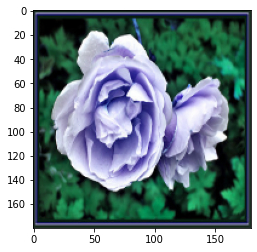

In [ ]:
plt.imshow(x[15])

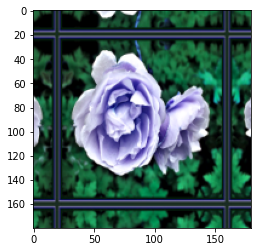

In [ ]:
plt.imshow(data_augumentation(x)[15])

In [ ]:
data_augmentation1 = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                          180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
   
    
  ]
)

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,                  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history = model.fit(x_train,y_train, epochs=30, 
                    validation_data=(x_test,y_test))

Epoch 1/30
92/92 [==============================] - 3s 28ms/step - loss: 1.4847 - accuracy: 0.3440 - val_loss: 1.0625 - val_accuracy: 0.5845
Epoch 2/30
92/92 [==============================] - 2s 25ms/step - loss: 1.0741 - accuracy: 0.5647 - val_loss: 1.0939 - val_accuracy: 0.5613
Epoch 3/30
92/92 [==============================] - 2s 25ms/step - loss: 1.0167 - accuracy: 0.6018 - val_loss: 0.9056 - val_accuracy: 0.6526
Epoch 4/30
92/92 [==============================] - 2s 25ms/step - loss: 0.8647 - accuracy: 0.6524 - val_loss: 0.9238 - val_accuracy: 0.6553
Epoch 5/30
92/92 [==============================] - 2s 25ms/step - loss: 0.8239 - accuracy: 0.6881 - val_loss: 0.8579 - val_accuracy: 0.6839
Epoch 6/30
92/92 [==============================] - 2s 25ms/step - loss: 0.8493 - accuracy: 0.6813 - val_loss: 0.8416 - val_accuracy: 0.6975
Epoch 7/30
92/92 [==============================] - 2s 25ms/step - loss: 0.7361 - accuracy: 0.7234 - val_loss: 0.8503 - val_accuracy: 0.6826
Epoch 8/30
92